# 利用wradlib识别地物回波

In [1]:
%matplotlib inline
import numpy as np
import wradlib as wrl
import matplotlib.pyplot as plt
import xarray as xr
import xradar as xd
import os
from metradar.io.decode_fmt_pyart import read_cnrad_fmt
import pyart



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:

filepath = '/mnt/e/metradar_test/clutter/'
filename = 'Z_RADR_I_Z9090_20250827045712_O_DOR_SB_CAP_FMT.bin.bz2'
print(os.path.exists(os.path.join(filepath, filename)))
# 先将基数据读取为pyart的radar格式
radar = read_cnrad_fmt(os.path.join(filepath, filename))
print(radar.info())



True
altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: Altitude
	standard_name: Altitude
	units: meters
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float64 and shape: (2787,)>
	units: degrees
	standard_name: beam_azimuth_angle
	long_name: azimuth_angle_from_true_north
	axis: radial_azimuth_coordinate
	comment: Azimuth of antenna relative to true north
elevation:
	data: <ndarray of type: float32 and shape: (2787,)>
	units: degrees
	standard_name: beam_elevation_angle
	long_name: elevation_angle_from_horizontal_plane
	axis: radial_elevation_coordinate
	comment: Elevation of antenna relative to the horizontal plane
fields:
	velocity:
		data: <ndarray of type: float32 and shape: (2787, 1840)>
		units: meters_per_second
		standard_name: radial_velocity_of_scatterers_away_from_instrument
		long_name: Mean doppler Velocity
		valid_max: 95.0
		valid_min: -95.0
		coordinates: elevation azimuth range
		_FillValue: -9999.0
	ref

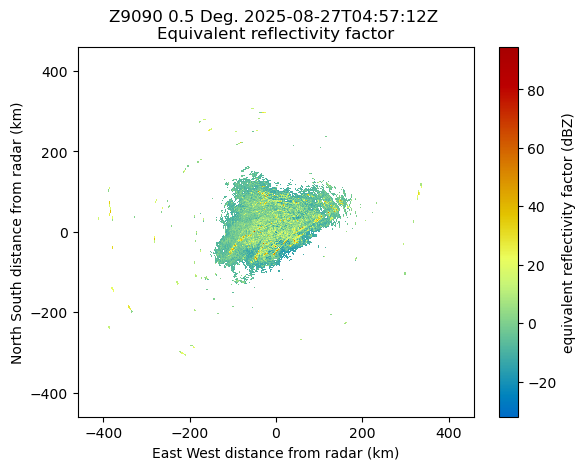

In [3]:
rd_display = pyart.graph.RadarDisplay(radar)
rd_display.plot_ppi(field='reflectivity',sweep=0)

In [5]:
# if radar.sweep_mode['data'].dtype.kind == 'S':
#     radar.sweep_mode['data'] = np.char.decode(radar.sweep_mode['data'], 'utf-8')
    
radar.instrument_parameters

{'unambiguous_range': {'units': 'meters',
  'comments': 'Unambiguous range',
  'meta_group': 'instrument_parameters',
  'long_name': 'Unambiguous range',
  'data': array([460000., 460000., 460000., ..., 330000., 330000., 330000.],
        shape=(2787,), dtype=float32)},
 'nyquist_velocity': {'units': 'meters_per_second',
  'comments': 'Unambiguous velocity',
  'meta_group': 'instrument_parameters',
  'long_name': 'Nyquist velocity',
  'data': array([ 8.,  8.,  8., ..., 11., 11., 11.], shape=(2787,), dtype=float32)},
 'radar_beam_width_h': {'units': 'degrees',
  'meta_group': 'radar_parameters',
  'long_name': 'Antenna beam width H polarization',
  'data': [0.8799999952316284]},
 'radar_beam_width_v': {'units': 'degrees',
  'meta_group': 'radar_parameters',
  'long_name': 'Antenna beam width V polarization',
  'data': [0.8799999952316284]},
 'radar_antenna_gain_h': {'data': [45]},
 'radar_antenna_gain_v': {'data': [45]},
 'radar_receiver_bandwidth': {'data': [1500000.0]}}

In [6]:
# 然后将radar输出为cfradial格式
print(os.path.join(filepath, filename.replace('bin.bz2','cfradial.nc')))
pyart.io.write_cfradial(os.path.join(filepath, filename.replace('bin.bz2','cfradial.nc')), radar)



/mnt/e/metradar_test/clutter/Z_RADR_I_Z9090_20250827045712_O_DOR_SB_CAP_FMT.cfradial.nc


In [7]:
# 再用xradar读取cfradial格式的数据
dtree = xd.io.open_cfradial1_datatree(os.path.join(filepath, filename.replace('bin.bz2','cfradial.nc')))
display(dtree.load())

<xarray.DataTree>
Group: /
│   Dimensions:              (sweep: 8)
│   Dimensions without coordinates: sweep
│   Data variables:
│       sweep_group_name     (sweep) <U7 224B 'sweep_0' 'sweep_1' ... 'sweep_7'
│       sweep_fixed_angle    (sweep) float32 32B 0.4834 0.4834 1.494 ... 3.516 4.482
│       latitude             float64 8B 30.8
│       longitude            float64 8B 108.7
│       altitude             float64 8B 1.075e+03
│       time_coverage_start  |S32 32B b'2025-08-27T04:57:12Z'
│       time_coverage_end    |S32 32B b'2025-08-27T05:06:52Z'
│       volume_number        int32 4B 0
│   Attributes:
│       Conventions:      CF/Radial instrument_parameters
│       version:          1.3
│       title:            
│       institution:      
│       references:       
│       source:           
│       comment:          
│       instrument_name:  Z9090
│       history:          
├── Group: /radar_parameters
│       Dimensions:                   ()
│       Data variables:
│           radar_antenna_gain_v      int64 8B 45
│           radar_beam_width_h        float64 8B 0.88
│           radar_antenna_gain_h      int64 8B 45
│           radar_beam_width_v        float64 8B 0.88
│           radar_receiver_bandwidth  float64 8B 1.5e+06
├── Group: /georeferencing_correction
├── Group: /radar_calibration
...
├── Group: /sweep_5
│       Dimensions:            (azimuth: 348, range: 1840)
│       Coordinates:
│         * azimuth            (azimuth) float64 3kB 1.0 2.0 3.0 ... 357.9 359.0 360.0
│         * range              (range) float32 7kB 250.0 500.0 ... 4.598e+05 4.6e+05
│           time               (azimuth) datetime64[ns] 3kB 2025-08-27T05:04:20 ... 2...
│           elevation          (azimuth) float32 1kB 2.5 2.5 2.5 2.5 ... 2.5 2.5 2.5 2.5
│           latitude           float64 8B 30.8
│           longitude          float64 8B 108.7
│           altitude           float64 8B 1.075e+03
│       Data variables:
│           velocity           (azimuth, range) float32 3MB nan nan nan ... nan nan nan
│           reflectivity       (azimuth, range) float32 3MB nan nan nan ... nan nan nan
│           spectrum_width     (azimuth, range) float32 3MB nan nan nan ... nan nan nan
│           sweep_number       int32 4B 5
│           sweep_fixed_angle  float32 4B 2.505
│           sweep_mode         <U20 80B 'azimuth_surveillance'
│           unambiguous_range  (azimuth) float32 1kB 2.3e+05 2.3e+05 ... 2.3e+05 2.3e+05
│           nyquist_velocity   (azimuth) float32 1kB 11.0 11.0 11.0 ... 11.0 11.0 11.0
├── Group: /sweep_6
│       Dimensions:            (azimuth: 348, range: 1840)
│       Coordinates:
│         * azimuth            (azimuth) float64 3kB 0.96 1.98 2.98 ... 358.9 359.9
│         * range              (range) float32 7kB 250.0 500.0 ... 4.598e+05 4.6e+05
│           time               (azimuth) datetime64[ns] 3kB 2025-08-27T05:05:29 ... 2...
│           elevation          (azimuth) float32 1kB 3.51 3.51 3.51 ... 3.51 3.51 3.51
│           latitude           float64 8B 30.8
│           longitude          float64 8B 108.7
│           altitude           float64 8B 1.075e+03
│       Data variables:
│           velocity           (azimuth, range) float32 3MB nan nan nan ... nan nan nan
│           reflectivity       (azimuth, range) float32 3MB nan nan nan ... nan nan nan
│           spectrum_width     (azimuth, range) float32 3MB nan nan nan ... nan nan nan
│           sweep_number       int32 4B 6
│           sweep_fixed_angle  float32 4B 3.516
│           sweep_mode         <U20 80B 'azimuth_surveillance'
│           unambiguous_range  (azimuth) float32 1kB 3.3e+05 3.3e+05 ... 3.3e+05 3.3e+05
│           nyquist_velocity   (azimuth) float32 1kB 11.0 11.0 11.0 ... 11.0 11.0 11.0
└── Group: /sweep_7
        Dimensions:            (azimuth: 348, range: 1840)
        Coordinates:
          * azimuth            (azimuth) float64 3kB 0.45 1.5 2.48 ... 357.4 358.4 359.4
          * range              (range) float32 7kB 250.0 500

In [8]:
# 将 rad_params 写入dtree['radar_parameters']
dtree['radar_parameters'] 

<xarray.DataTree 'radar_parameters'>
Group: /radar_parameters
    Dimensions:                   (sweep: 8)
    Dimensions without coordinates: sweep
    Data variables:
        radar_antenna_gain_v      int64 8B 45
        radar_beam_width_h        float64 8B 0.88
        radar_antenna_gain_h      int64 8B 45
        radar_beam_width_v        float64 8B 0.88
        radar_receiver_bandwidth  float64 8B 1.5e+06

In [9]:
swp0 = (
    dtree["sweep_0"]
    .to_dataset()
    .wrl.georef.georeference(crs=wrl.georef.get_earth_projection())
    .set_coords("sweep_mode")
)
swp0.x.attrs = xd.model.get_longitude_attrs()
swp0.y.attrs = xd.model.get_latitude_attrs()
display(swp0)

<xarray.Dataset> Size: 36MB
Dimensions:            (azimuth: 349, range: 1840)
Coordinates: (12/15)
  * azimuth            (azimuth) float64 3kB 0.42 1.43 2.45 ... 358.4 359.4
  * range              (range) float32 7kB 250.0 500.0 ... 4.598e+05 4.6e+05
    sweep_mode         <U20 80B 'azimuth_surveillance'
    time               (azimuth) datetime64[ns] 3kB 2025-08-27T04:57:24 ... 2...
    elevation          (azimuth) float32 1kB 0.48 0.48 0.48 ... 0.48 0.48 0.48
    latitude           float64 8B 30.8
    ...                 ...
    y                  (azimuth, range) float64 5MB 30.81 30.81 ... 34.94 34.94
    z                  (azimuth, range) float64 5MB 1.077e+03 ... 1.736e+04
    gr                 (azimuth, range) float64 5MB 0.002251 0.004506 ... 4.141
    rays               (azimuth, range) float64 5MB 0.42 0.42 ... 359.4 359.4
    bins               (azimuth, range) float32 3MB 250.0 500.0 ... 4.6e+05
    crs_wkt            int64 8B 0
Data variables:
    velocity           (azimuth, range) float32 3MB nan nan nan ... nan nan nan
    reflectivity       (azimuth, range) float32 3MB nan nan nan ... nan nan nan
    spectrum_width     (azimuth, range) float32 3MB nan nan nan ... nan nan nan
    sweep_number       int32 4B 0
    sweep_fixed_angle  float32 4B 0.4834
    unambiguous_range  (azimuth) float32 1kB 4.6e+05 4.6e+05 ... 4.6e+05 4.6e+05
    nyquist_velocity   (azimuth) float32 1kB 8.0 8.0 8.0 8.0 ... 8.0 8.0 8.0 8.0

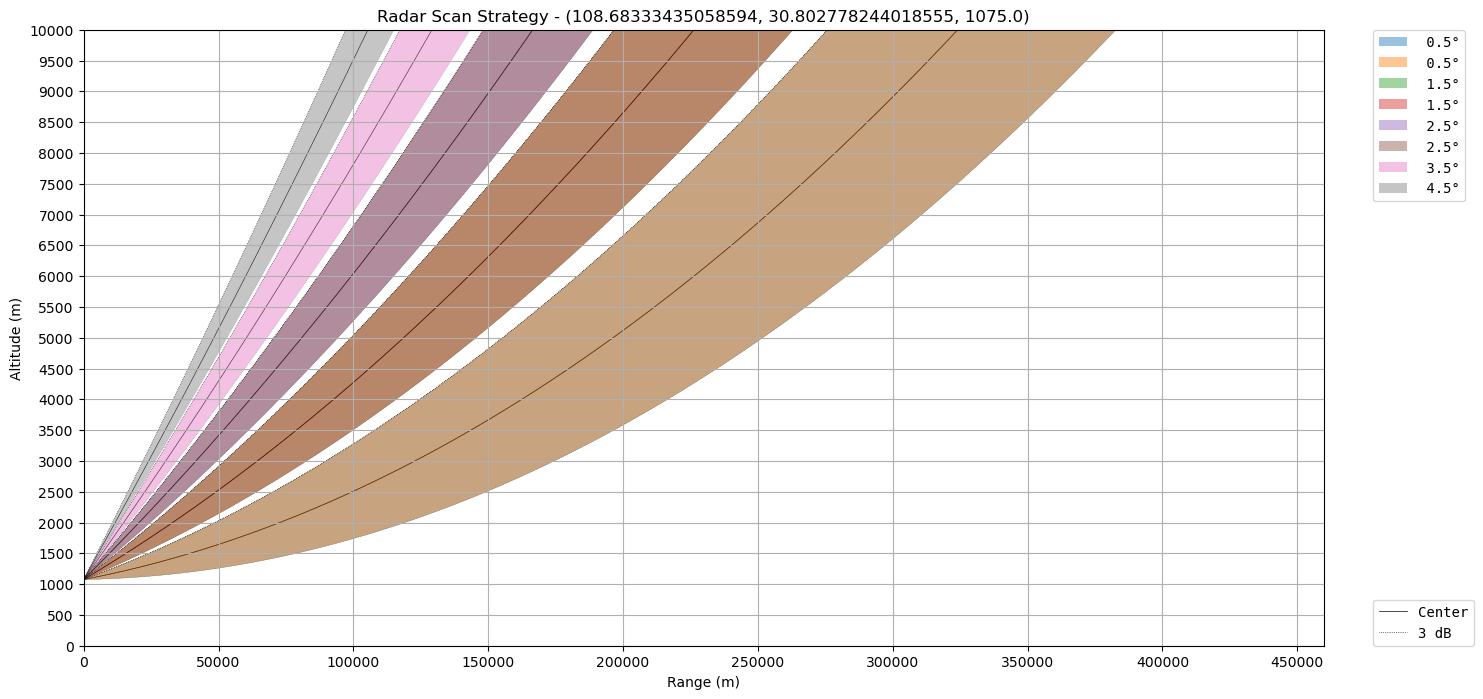

In [10]:
radar_parameters = dtree["radar_parameters"]
bw = radar_parameters["radar_beam_width_h"]
nrays = swp0.azimuth.size
nbins = swp0.range.size
range_res = 250.0
ranges = np.arange(nbins) * range_res
elevs = dtree.root.sweep_fixed_angle.values

sitecoords = (
    dtree.root.longitude.values.item(),
    dtree.root.latitude.values.item(),
    dtree.root.altitude.values.item(),
)

ax = wrl.vis.plot_scan_strategy(
    ranges,
    elevs,
    sitecoords,
    beamwidth=radar_parameters["radar_beam_width_h"].values,
    terrain=None,
)

## Calculate clutter map

In [11]:
print(swp0)
clmap = swp0.reflectivity.wrl.classify.filter_gabella(
    wsize=5,
    thrsnorain=0.0,
    tr1=21.0,  # 21.,
    n_p=23.0,  # 23,
    tr2=1.3,
    rm_nans=False,
)
swp0 = swp0.assign({"CMAP": clmap})

<xarray.Dataset> Size: 36MB
Dimensions:            (azimuth: 349, range: 1840)
Coordinates: (12/15)
  * azimuth            (azimuth) float64 3kB 0.42 1.43 2.45 ... 358.4 359.4
  * range              (range) float32 7kB 250.0 500.0 ... 4.598e+05 4.6e+05
    sweep_mode         <U20 80B 'azimuth_surveillance'
    time               (azimuth) datetime64[ns] 3kB 2025-08-27T04:57:24 ... 2...
    elevation          (azimuth) float32 1kB 0.48 0.48 0.48 ... 0.48 0.48 0.48
    latitude           float64 8B 30.8
    ...                 ...
    y                  (azimuth, range) float64 5MB 30.81 30.81 ... 34.94 34.94
    z                  (azimuth, range) float64 5MB 1.077e+03 ... 1.736e+04
    gr                 (azimuth, range) float64 5MB 0.002251 0.004506 ... 4.141
    rays               (azimuth, range) float64 5MB 0.42 0.42 ... 359.4 359.4
    bins               (azimuth, range) float32 3MB 250.0 500.0 ... 4.6e+05
    crs_wkt            int64 8B 0
Data variables:
    velocity           (a

## Plot Reflectivities, Clutter and Cluttermap

Text(0.5, 1.0, 'Reflectivity clutter removed')

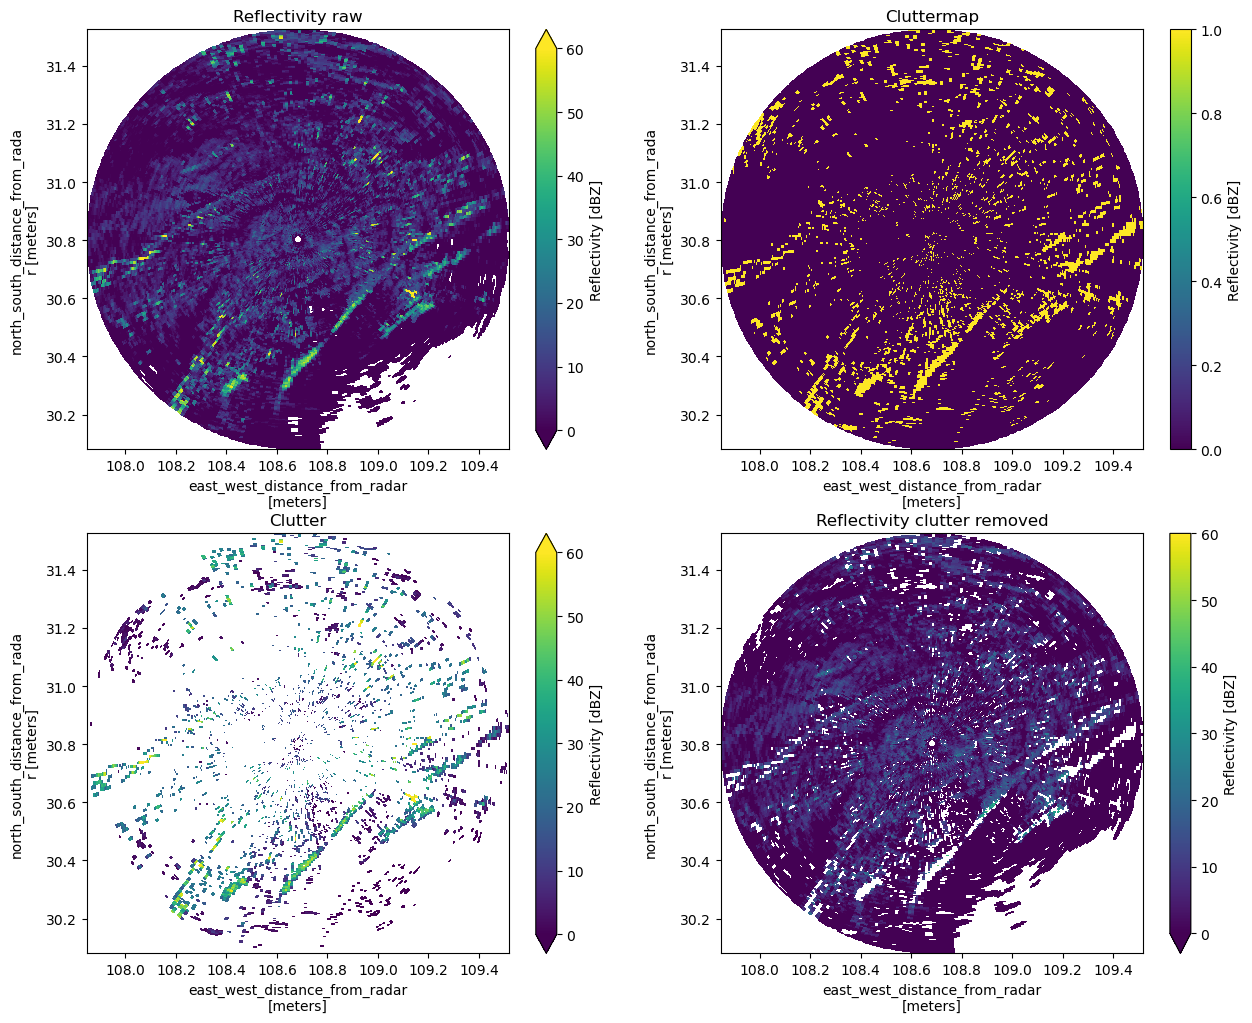

In [12]:
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(221)
from osgeo import osr

wgs84 = osr.SpatialReference()
wgs84.ImportFromEPSG(4326)
swp = swp0.sel(range=slice(0, 80000)).set_coords("sweep_mode").wrl.georef.georeference(crs=wgs84)
swp.reflectivity.plot(x="x", y="y", ax=ax1, vmin=0, vmax=60)
ax1.set_title("Reflectivity raw")
ax2 = fig.add_subplot(222)
swp.CMAP.plot(x="x", y="y", ax=ax2)
ax2.set_title("Cluttermap")
ax3 = fig.add_subplot(223)
swp.reflectivity.where(swp.CMAP == 1).plot(x="x", y="y", ax=ax3, vmin=0, vmax=60)
ax3.set_title("Clutter")
ax4 = fig.add_subplot(224)
swp.reflectivity.where(swp.CMAP < 1).plot(x="x", y="y", ax=ax4, vmin=0, vmax=60)
ax4.set_title("Reflectivity clutter removed")

## Get Digital Elevation Map (DEM)

In [ ]:

dem = (
    xr.open_dataset("/home/wjzhu/OneDrive/PythonCode/MyWork/metradar/resources/DEM/chongqing_dem_30m.nc")
    .rename(dem30="DEM")
)
display(dem)

<xarray.Dataset> Size: 415MB
Dimensions:  (y: 7201, x: 7200)
Coordinates:
  * y        (y) float64 58kB 30.0 30.0 30.0 30.0 30.0 ... 32.0 32.0 32.0 32.0
  * x        (x) float64 58kB 107.5 107.5 107.5 107.5 ... 109.5 109.5 109.5
Data variables:
    DEM      (y, x) float64 415MB ...

In [ ]:
radar_parameters = dtree["radar_parameters"]
bw = radar_parameters["radar_beam_width_h"]
bw

<xarray.DataArray 'radar_beam_width_h' ()> Size: 8B
array(0.88)
Attributes:
    long_name:   Antenna beam width H polarization
    units:       degrees
    meta_group:  radar_parameters

## Prepare DEM for Polar Processing

Here the power of [xr.apply_ufunc](https://docs.xarray.dev/en/stable/generated/xarray.apply_ufunc.html) is shown, a wrapper to xarray-ify numpy functions.

In [ ]:
def interpolate_dem(obj, dem, **kwargs):
    dim0 = obj.wrl.util.dim0()

    def wrapper(sx, sy, dx, dy, dem, *args, **kwargs):
        y, x = np.meshgrid(dy, dx)
        rastercoords = np.dstack([x, y])
        polcoords = np.dstack([sx, sy])
        return wrl.ipol.cart_to_irregular_spline(rastercoords, dem, polcoords, **kwargs)

    out = xr.apply_ufunc(
        wrapper,
        obj.x,
        obj.y,
        dem.x,
        dem.y,
        dem,
        input_core_dims=[[dim0, "range"], [dim0, "range"], ["x"], ["y"], ["y", "x"]],
        output_core_dims=[[dim0, "range"]],
        dask="parallelized",
        vectorize=True,
        kwargs=kwargs,
        dask_gufunc_kwargs=dict(allow_rechunk=True),
    )
    out.name = "DEM"
    return obj.assign(DEM=out)

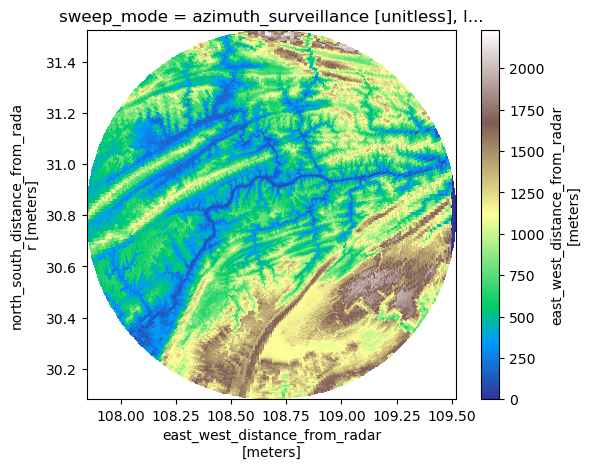

In [ ]:
swp = interpolate_dem(swp, dem.DEM, order=3, prefilter=False)
swp.DEM.wrl.vis.plot(cmap="terrain", vmin=0)

## Plot scan strategy

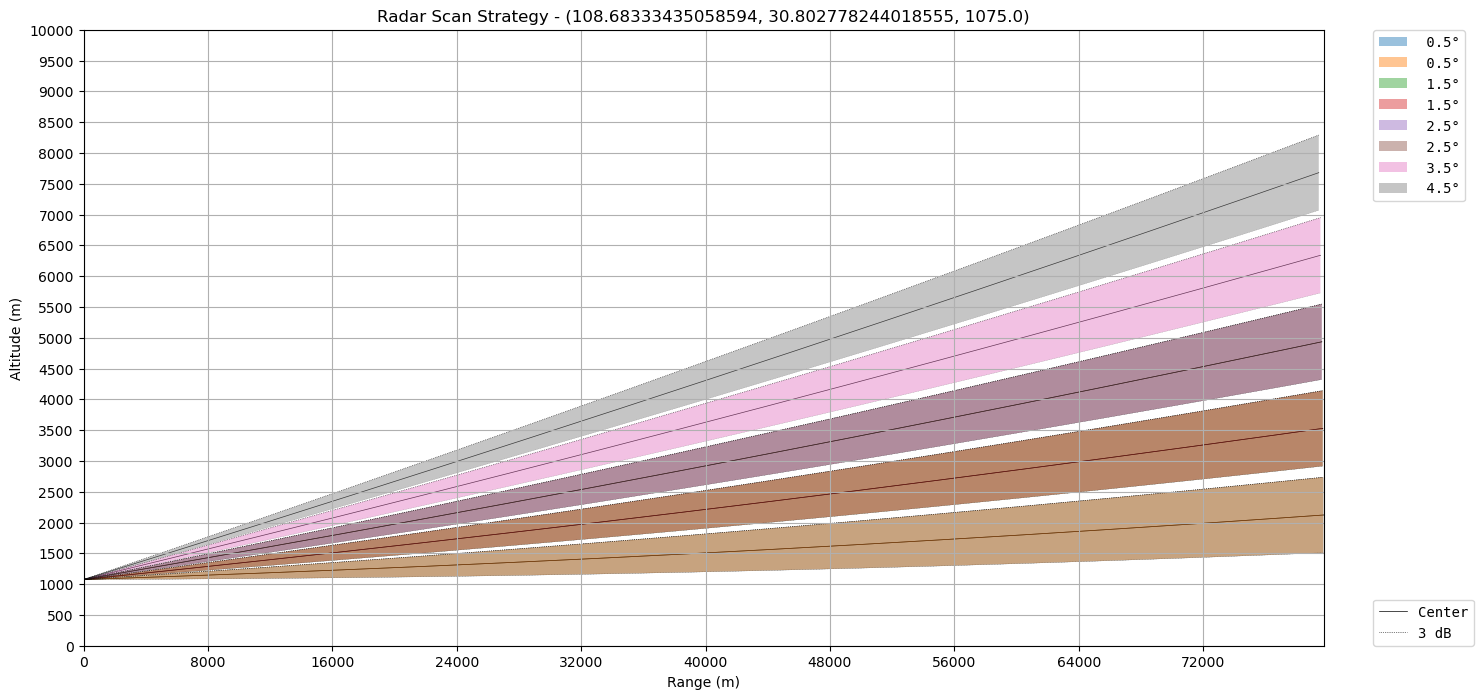

In [ ]:
nrays = swp.azimuth.size
nbins = swp.range.size
range_res = 250.0
ranges = np.arange(nbins) * range_res
elevs = dtree.root.sweep_fixed_angle.values

sitecoords = (
    dtree.root.longitude.values.item(),
    dtree.root.latitude.values.item(),
    dtree.root.altitude.values.item(),
)

ax = wrl.vis.plot_scan_strategy(
    ranges,
    elevs,
    sitecoords,
    beamwidth=radar_parameters["radar_beam_width_h"].values,
    terrain=None,
)

Use `terrain=swp.DEM.sel(azimuth=0, method="nearest")` to get some arbitrary ray.

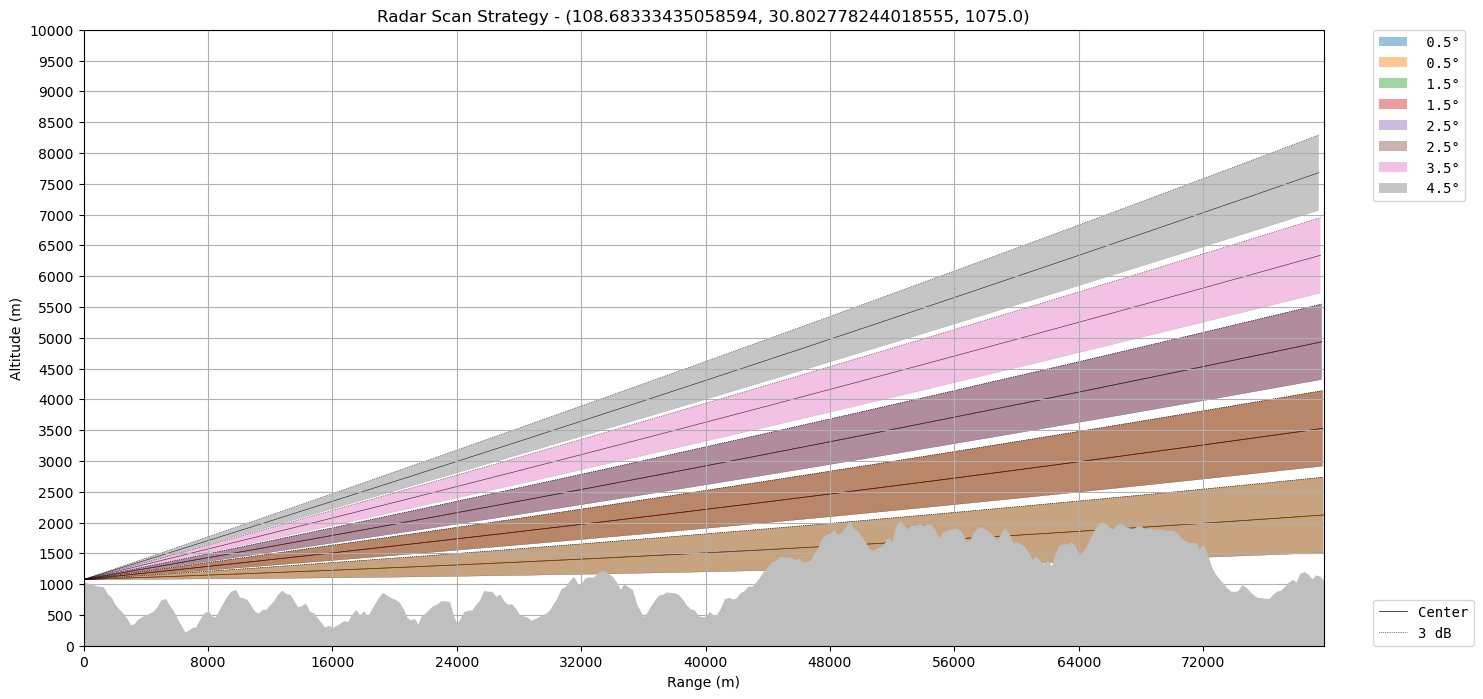

In [ ]:
ax = wrl.vis.plot_scan_strategy(
    ranges,
    elevs,
    sitecoords,
    beamwidth=radar_parameters["radar_beam_width_h"].values,
    terrain=swp.DEM.sel(azimuth=120, method="nearest"),
)

# Compare with corrected reflectivity from signal processor 

plus additional simple RHOHV filter

In [ ]:
# # dual radar 
# fig = plt.figure(figsize=(15, 6))
# ax1 = fig.add_subplot(121)
# swp.DBZ.plot(x="x", y="y", ax=ax1, vmin=0, vmax=60)
# ax1.set_title("Reflectivity corr")
# ax2 = fig.add_subplot(122)
# swp.DBZ.where((swp.CMAP < 1) & (swp.RHOHV >= 0.8)).plot(
#     x="x", y="y", ax=ax2, vmin=0, vmax=60
# )
# ax2.set_title("Reflectivity clutter removed")

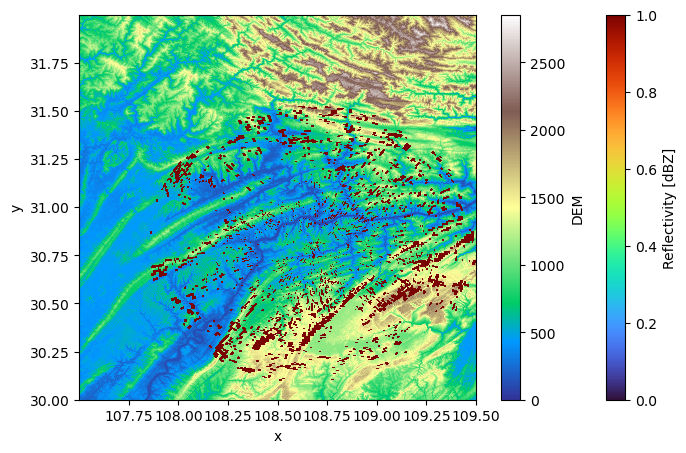

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111)
swp.CMAP.where(swp.CMAP == 1).plot(x="x", y="y", vmin=0, vmax=1, cmap="turbo")
ax1.set_title("Reflectivity corr")
dem.DEM.plot(ax=ax1, zorder=-2, cmap="terrain", vmin=0)

In [ ]:
# !pip install hvplot
# !pip install datashader
# !pip uninstall numpy -y
# !pip install numpy==2.3
#!pip install panel

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


In [ ]:
swp.CMAP.where(swp.CMAP == 1).compute()

<xarray.DataArray 'CMAP' (azimuth: 349, range: 320)> Size: 893kB
array([[nan, nan, nan, ...,  1.,  1., nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], shape=(349, 320))
Coordinates: (12/15)
  * azimuth     (azimuth) float64 3kB 0.42 1.43 2.45 3.43 ... 357.4 358.4 359.4
  * range       (range) float32 1kB 250.0 500.0 750.0 ... 7.975e+04 8e+04
    sweep_mode  <U20 80B 'azimuth_surveillance'
    time        (azimuth) datetime64[ns] 3kB 2025-08-27T04:57:24 ... 2025-08-...
    elevation   (azimuth) float32 1kB 0.48 0.48 0.48 0.48 ... 0.48 0.48 0.48
    latitude    float64 8B 30.8
    ...          ...
    y           (azimuth, range) float64 893kB 30.81 30.81 30.81 ... 31.52 31.52
    z           (azimuth, range) float64 893kB 1.077e+03 1.079e+03 ... 2.122e+03
    gr          (azimuth, range) float64 893kB 0.002251 0.004506 ... 0.7214
    rays        (azimuth, range) float64 893kB 0.42 0.42 0.42 ... 359.4 359.4
    bins        (azimuth, range) float32 447kB 250.0 500.0 ... 7.975e+04 8e+04
    crs_wkt     int64 8B 0
Attributes:
    long_name:      Reflectivity
    units:          dBZ
    standard_name:  equivalent_reflectivity_factor
    valid_max:      94.5
    valid_min:      -32.0

## BeamBlockage Calculation

Can you xarray-ify the following, too?

In [ ]:
beamradius = wrl.util.half_power_radius(swp.range, bw)
PBB = wrl.qual.beam_block_frac(swp.DEM.values, swp.z.values, beamradius)
PBB = np.ma.masked_invalid(PBB)
CBB = wrl.qual.cum_beam_block_frac(PBB)

In [ ]:
swp = swp.assign(
    CBB=(["azimuth", "range"], CBB),
    PBB=(["azimuth", "range"], PBB),
)

In [ ]:
# just a little helper function to style x and y axes of our maps
def annotate_map(ax, cm=None, title=""):
    # ticks = (ax.get_xticks() / 1000).astype(int)
    # ax.set_xticklabels(ticks)
    # ticks = (ax.get_yticks() / 1000).astype(int)
    # ax.set_yticklabels(ticks)
    # ax.set_xlabel("Kilometers")
    # ax.set_ylabel("Kilometers")
    if not cm is None:
        plt.colorbar(cm, ax=ax)
    if not title == "":
        ax.set_title(title)
    ax.grid()

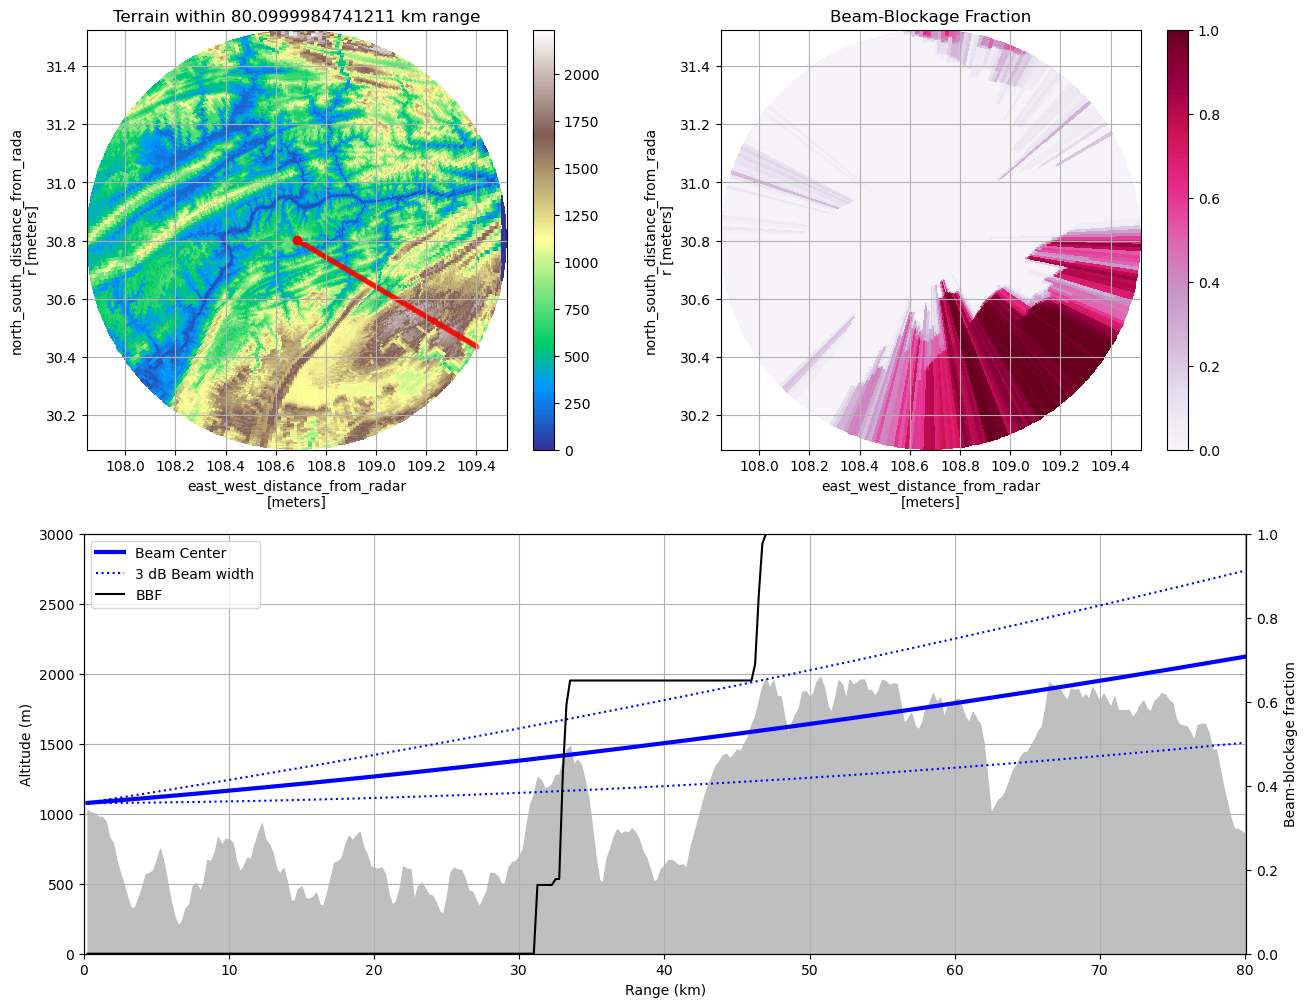

In [ ]:
import matplotlib as mpl

sitecoords = (swp.longitude.values, swp.latitude.values, swp.altitude.values)
r = swp.range.values
az = swp.azimuth.values

alt = swp.z.values
fig = plt.figure(figsize=(15, 12))

# create subplots
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2, rowspan=1)

# azimuth angle
angle = 120

# Plot terrain (on ax1)
dem_pm = swp.DEM.wrl.vis.plot(ax=ax1, cmap=mpl.cm.terrain, vmin=0.0, add_colorbar=False)
swp.sel(azimuth=angle, method="nearest").plot.scatter(
    x="x", y="y", marker=".", color="r", alpha=0.2, ax=ax1
)
ax1.plot(swp.longitude.values, swp.latitude.values, "ro")
annotate_map(
    ax1,
    dem_pm,
    "Terrain within {0} km range".format(np.max(swp.range.values / 1000.0) + 0.1),
)

# Plot CBB (on ax2)
cbb = swp.CBB.wrl.vis.plot(ax=ax2, cmap=mpl.cm.PuRd, vmin=0, vmax=1, add_colorbar=False)
annotate_map(ax2, cbb, "Beam-Blockage Fraction")

# Plot single ray terrain profile on ax3
(bc,) = ax3.plot(
    swp.range / 1000.0, swp.z[angle, :], "-b", linewidth=3, label="Beam Center"
)
(b3db,) = ax3.plot(
    swp.range.values / 1000.0,
    (swp.z[angle, :] + beamradius),
    ":b",
    linewidth=1.5,
    label="3 dB Beam width",
)
ax3.plot(swp.range / 1000.0, (swp.z[angle, :] - beamradius), ":b")
ax3.fill_between(swp.range / 1000.0, 0.0, swp.DEM[angle, :], color="0.75")
ax3.set_xlim(0.0, np.max(swp.range / 1000.0) + 0.1)
ax3.set_ylim(0.0, 3000)
ax3.set_xlabel("Range (km)")
ax3.set_ylabel("Altitude (m)")
ax3.grid()

axb = ax3.twinx()
(bbf,) = axb.plot(swp.range / 1000.0, swp.CBB[angle, :], "-k", label="BBF")
axb.set_ylabel("Beam-blockage fraction")
axb.set_ylim(0.0, 1.0)
axb.set_xlim(0.0, np.max(swp.range / 1000.0) + 0.1)


legend = ax3.legend(
    (bc, b3db, bbf),
    ("Beam Center", "3 dB Beam width", "BBF"),
    loc="upper left",
    fontsize=10,
)

## Some EyeCandy

In [ ]:
def height_formatter(x, pos):
    x = (x - 6370000) / 1000
    fmt_str = "{:g}".format(x)
    return fmt_str


def range_formatter(x, pos):
    x = x / 1000.0
    fmt_str = "{:g}".format(x)
    return fmt_str

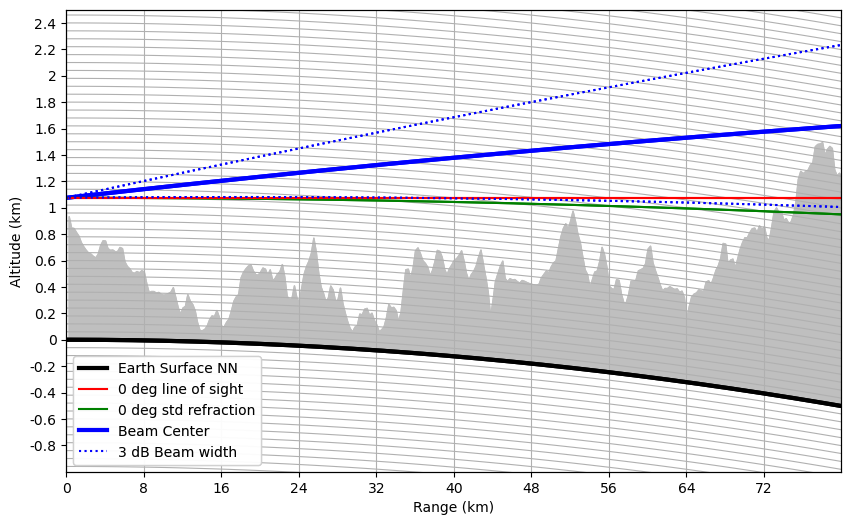

In [ ]:
fig = plt.figure(figsize=(10, 6))

cgax, caax, paax = wrl.vis.create_cg(fig=fig, rot=0, scale=1)

# azimuth angle
angle = 0

# fix grid_helper
er = 6370000
gh = cgax.get_grid_helper()
gh.grid_finder.grid_locator2._nbins = 80
gh.grid_finder.grid_locator2._steps = [1, 2, 4, 5, 10]

# calculate beam_height and arc_distance for ke=1
# means line of sight
bhe = wrl.georef.bin_altitude(r, 0, sitecoords[2], re=er, ke=1.0)
ade = wrl.georef.bin_distance(r, 0, sitecoords[2], re=er, ke=1.0)
nn0 = np.zeros_like(r)
# for nice plotting we assume earth_radius = 6370000 m
ecp = nn0 + er
# theta (arc_distance sector angle)
thetap = -np.degrees(ade / er) + 90.0

# zero degree elevation with standard refraction
bh0 = wrl.georef.bin_altitude(r, 0, sitecoords[2], re=er)

# plot (ecp is earth surface normal null)
(bes,) = paax.plot(thetap, ecp, "-k", linewidth=3, label="Earth Surface NN")
(bc,) = paax.plot(thetap, ecp + alt[angle, :], "-b", linewidth=3, label="Beam Center")
(bc0r,) = paax.plot(thetap, ecp + bh0, "-g", label="0 deg Refraction")
(bc0n,) = paax.plot(thetap, ecp + bhe, "-r", label="0 deg line of sight")
(b3db,) = paax.plot(
    thetap, ecp + alt[angle, :] + beamradius, ":b", label="+3 dB Beam width"
)
paax.plot(thetap, ecp + alt[angle, :] - beamradius, ":b", label="-3 dB Beam width")

# orography
paax.fill_between(thetap, ecp, ecp + swp.DEM[angle, :], color="0.75")

# shape axes
cgax.set_xlim(0, np.max(ade))
cgax.set_ylim([ecp.min() - 1000, ecp.max() + 2500])
caax.grid(True, axis="x")
cgax.grid(True, axis="y")
cgax.axis["top"].toggle(all=False)
caax.yaxis.set_major_locator(
    mpl.ticker.MaxNLocator(steps=[1, 2, 4, 5, 10], nbins=20, prune="both")
)
caax.xaxis.set_major_locator(mpl.ticker.MaxNLocator())
caax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(height_formatter))
caax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(range_formatter))

caax.set_xlabel("Range (km)")
caax.set_ylabel("Altitude (km)")

legend = paax.legend(
    (bes, bc0n, bc0r, bc, b3db),
    (
        "Earth Surface NN",
        "0 deg line of sight",
        "0 deg std refraction",
        "Beam Center",
        "3 dB Beam width",
    ),
    loc="lower left",
    fontsize=10,
)

---

## Summary
We've just learned how to use $\omega radlib$'s Gabella clutter detection for single sweeps. We've looked into digital elevation maps and beam blockage calculations.

## Resources and references

- [xarray](https://docs.xarray.dev)
- [dask](https://docs.dask.org/)
- [GDAL](https://gdal.org)
- [xradar backends](https://docs.openradarscience.org/projects/xradar/en/stable/importers.html)
- [CfRadial1](https://ncar.github.io/CfRadial/)